In [70]:
import pandas as pd
import numpy as np
from sklearn import gaussian_process
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel

In [5]:
df = pd.read_csv('shampoo.csv')

<AxesSubplot:>

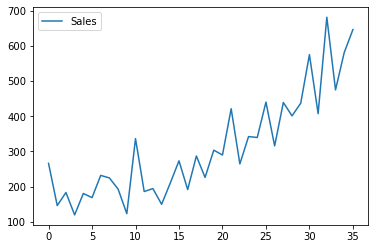

In [7]:
df.plot()

In [8]:
df.columns

Index(['Month', 'Sales'], dtype='object')

In [34]:
y = df['Sales'].values

In [53]:
x = np.arange(0,len(y))

In [54]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [62]:
x=x.reshape(-1,1)
x.shape

(36, 1)

/opt/anaconda3/envs/ml_general/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

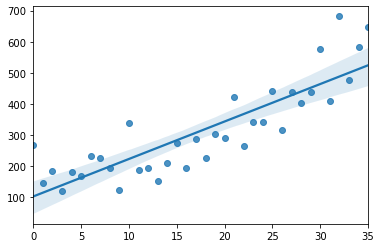

In [63]:
sns.regplot(x, y, fit_reg=True)

In [135]:
#kernel = ConstantKernel() + Matern(length_scale=1, nu=1/2) + WhiteKernel(noise_level=1e-4)
kernel = Matern(length_scale=1, nu=1/2)

In [136]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)

In [137]:
gp.fit(x,y)

/opt/anaconda3/envs/ml_general/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:1624: RuntimeWarning: invalid value encountered in true_divide
  / np.sqrt(D.sum(2))[:, :, np.newaxis]


GaussianProcessRegressor(kernel=Matern(length_scale=1, nu=0.5))

In [138]:
gp.kernel_

Matern(length_scale=3.08, nu=0.5)

In [139]:
x_pred = np.linspace(0, 35).reshape(-1,1)
y_pred, sigma = gp.predict(x_pred, return_std=True)

/opt/anaconda3/envs/ml_general/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


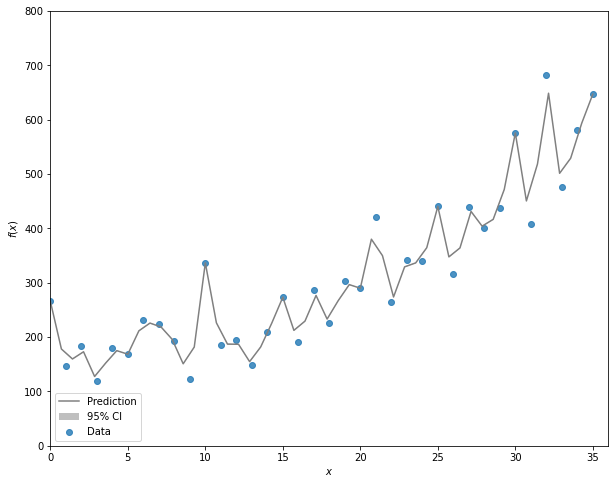

In [140]:
plt.figure(figsize=(10,8))
sns.regplot(x, y, fit_reg=False, label='Data')
plt.plot(x_pred, y_pred, color='grey', label='Prediction')
plt.fill(np.concatenate([x_pred, x_pred[::-1]]),
         np.concatenate([y_pred - 2*sigma,
                        (y_pred + 2*sigma)[::-1]]),
         alpha=.5, fc='grey', ec='None', label='95% CI')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.xlim(0, 36)
plt.ylim(0, 800)
plt.legend(loc='lower left');